In [1]:
import numpy as np
import pacmap
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE

In [2]:
PATH_CSV = './top_3827348_songs.csv'
SAMPLE_SIZE = None
SEED = 42
MAX_TRACK_NAME_LENGTH = 20

In [3]:
def to_str(x):
    return x[2:-1]

def to_list(x):
    return [y for y in to_str(x).split(',')]

df_complete = pd.read_csv(
    PATH_CSV,
    converters={
        'id': to_str, 'name': to_str, 'duration': np.int32, 'explicit': np.int32,
        'popularity': np.int32, 'loudness': np.float32, 'tempo': np.float32,
        'time_signature': np.int32, 'key': np.int32, 'mode': np.int32, 'acousticness': np.float32,
        'danceability': np.float32, 'energy': np.float32, 'instrumentalness': np.float32,
        'liveness': np.float32, 'speechiness': np.float32, 'valence': np.float32,
        'artist_ids': to_list, 'artist_names': to_list, 'artist_followers': to_list,
        'artist_popularities': to_list, 'album_ids': to_list, 'album_names': to_list,
        'album_types': to_list, 'album_release_dates': to_list, 'album_popularities': to_list,
        'genres': to_list
    }
)
df_complete.head()

,id,name,duration,explicit,popularity,loudness,tempo,time_signature,key,mode,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,artist_ids,artist_names,artist_followers,artist_popularities,album_ids,album_names,album_types,album_release_dates,album_popularities,genres
0,0000gBWfr2zIFzE5tDzxca,Sella Stercoraria,507987,0,3,-8.065,80.509003,4,9,0,0.000013,0.322,0.670,0.559000,0.3510,0.0449,0.176,[0Tgtl5beIMahbtIzV5jBXw],[Rattenf\xc3\xa4nger],[950],[7],[1HyOZ6YUbaWNdnPjo9UOUE],[Geisslerlieder],[album],[1575590400000],[8],[ukrainian metal]
1,0003Z98F6hUq7XxqSRM87H,\xd0\x9c\xd0\xb5\xd0\xbd\xd1\x8f \xd0\xb1\xd0\xbe\xd0\xbb\xd1\x8c\xd1\x88\xd0\xb5 \xd1\x82\xd1\x83\xd1\x82 \xd0\xbd\xd0\xb5\xd1\x82,241666,1,18,-5.408,138.076004,4,1,1,0.086000,0.733,0.711,0.000000,0.4510,0.1580,0.346,[08RxfNkJpjJ4dJb4xASWzj],[Jacques Anthony],[0],[0],[0003Z98F6hUq7XxqSRM87H],[#NoName],[album],[1436400000000],[17],"[russian hip hop, russian trap]"
2,0003q2V7hAiIYyzXV4sNyQ,"Das wilde Pack, Teil 1: Das wilde Pack, Kapitel 5",200974,0,11,-14.880,79.250000,3,0,1,0.500000,0.520,0.416,0.000000,0.5950,0.9540,0.538,[7vYT04Nb7z9QUTf4F8oG2c],[Das wilde Pack],[3090],[24],[7uwWybYhEK3rhg6QDJo9Rw],[Teil 1: Das wilde Pack],[album],[1225238400000],[21],[kleine hoerspiel]
3,000490QTLqT1ftnfwj3kGF,Disco Guitar,73195,0,2,-14.496,157.445007,4,1,1,0.665000,0.742,0.661,0.000052,0.3070,0.1180,0.922,[0cKrM2XKF7wxyfEQDauvyQ],[DJ Godfather],[0],[0],[1sDqcoOS1JuKSFHNkcU4jL],[Da Bomb Vol 1],[album],[975974400000],[10],"[electro, ghettotech]"
4,00053lDuLvN8Q8voGT3GCt,Soki,279880,0,1,-5.135,104.961998,4,7,1,0.673000,0.622,0.734,0.000002,0.0954,0.0476,0.481,[6HAIuUS4d8W4zjDTl6rsaU],[Barbara Kanam],[0],[0],[6XAXAPWJCpXmracdcF30Jr],[Karibu],[album],[1230768000000],[14],[makossa]


In [4]:
if SAMPLE_SIZE is not None:
    df = df_complete.sample(n=SAMPLE_SIZE, random_state=SEED).copy()
else:
    df = df_complete.copy()

In [5]:
df = df.set_index('id')
df = df[df['artist_names'].apply(lambda x: 'Taylor Swift' in x)]
df = df.sort_values(by='popularity', ascending=False)
print(len(df))
df.head()

478


,name,duration,explicit,popularity,loudness,tempo,time_signature,key,mode,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,artist_ids,artist_names,artist_followers,artist_popularities,album_ids,album_names,album_types,album_release_dates,album_popularities,genres
id,,,,,,,,,,,,,,,,,,,,,,,,,,
0lx2cLdOt3piJbcaXIV74f,willow,214706,0,86,-9.195,81.112000,4,7,1,0.83300,0.392,0.574,0.001790,0.1450,0.1700,0.529,[06HL4z0CvFAxyc27GXpf02],[Taylor Swift],[38455481],[97],[2Xoteh7uEpea4TohMxjtaq],[evermore],[album],[1607644800000],[89],"[pop, post-teen pop]"
4R2kfaDFhslZEMJqAFNpdd,cardigan,239560,0,84,-8.588,130.033005,4,0,0,0.53700,0.613,0.581,0.000345,0.2500,0.0424,0.551,[06HL4z0CvFAxyc27GXpf02],[Taylor Swift],[38455481],[97],[2fenSS68JI1h4Fo296JfGr],[folklore],[album],[1595548800000],[89],"[pop, post-teen pop]"
0sY6ZUTh4yoctD8VIXz339,champagne problems,244000,1,82,-12.077,171.319000,4,0,1,0.92000,0.462,0.240,0.000000,0.1130,0.0377,0.320,[06HL4z0CvFAxyc27GXpf02],[Taylor Swift],[38455481],[97],[2Xoteh7uEpea4TohMxjtaq],[evermore],[album],[1607644800000],[89],"[pop, post-teen pop]"
4pvb0WLRcMtbPGmtejJJ6y,exile (feat. Bon Iver),285634,0,82,-8.426,75.601997,4,6,1,0.77800,0.298,0.380,0.000056,0.1100,0.0287,0.152,"[06HL4z0CvFAxyc27GXpf02, 4LEiUm1SRbFMgfqnQTwUbQ]","[Taylor Swift, Bon Iver]","[38455481, 2951666]","[97, 80]",[2fenSS68JI1h4Fo296JfGr],[folklore],[album],[1595548800000],[89],"[pop, post-teen pop, eau claire indie, indie folk, melancholia]"
6RRNNciQGZEXnqk8SQ9yv5,You Need To Calm Down,171360,0,81,-5.617,85.026001,4,2,1,0.00929,0.771,0.671,0.000000,0.0637,0.0553,0.714,[06HL4z0CvFAxyc27GXpf02],[Taylor Swift],[38455481],[97],[1NAmidJlEaVgA3MpcPFYGq],[Lover],[album],[1566518400000],[89],"[pop, post-teen pop]"


In [34]:
selected_cols = frozenset([
    'duration', 'explicit', 'loudness', 'tempo',
    'time_signature', 'key', 'mode', 'acousticness', 'danceability',
    'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence'
])
scaler = StandardScaler()
X_selected = scaler.fit_transform(df[selected_cols])

In [38]:
colors = MinMaxScaler().fit_transform(df[['popularity']])

In [39]:
pca_music = PCA(n_components=2, random_state=SEED).fit(X_selected)
X_music_pca = pca_music.transform(X_selected)

In [40]:
pca_music.explained_variance_

array([4.16614797, 2.09119875])

In [41]:
pca_music.explained_variance_ratio_

array([0.29695944, 0.14905885])

In [42]:
pd.DataFrame(
    pca_music.components_.T.round(3),
    index=selected_cols,
    columns=['PCA1', 'PCA2']
)

,PCA1,PCA2
explicit,0.009,0.338
liveness,0.113,-0.239
tempo,-0.208,-0.013
danceability,0.234,-0.331
mode,-0.210,0.154
energy,-0.343,-0.404
instrumentalness,-0.071,0.024
key,0.153,-0.147
valence,0.159,-0.464
speechiness,0.442,-0.111


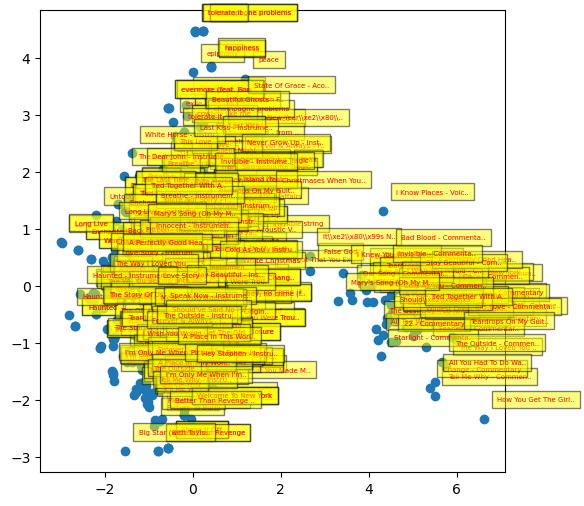

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(X_music_pca[:, 0], X_music_pca[:, 1])
for i in range(X_music_pca.shape[0]):
    track_name = repr(df['name'].iloc[i]).replace('$', r'\$')[1:-1]
    plt.text(
        x=X_music_pca[i, 0] + 0.3,
        y=X_music_pca[i, 1] + 0.3,
        s=(track_name[:MAX_TRACK_NAME_LENGTH] + '..') if len(track_name) > MAX_TRACK_NAME_LENGTH else track_name,
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
plt.show()

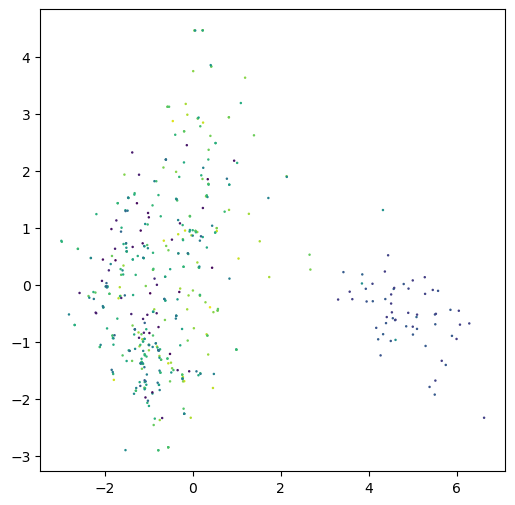

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
    X_music_pca[:, 0],
    X_music_pca[:, 1],
    cmap='viridis',
    c=colors,
    s=0.6
)

In [45]:
tsne = TSNE(verbose=1, random_state=SEED)
tsne_results = tsne.fit_transform(X_selected)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 478 samples in 0.001s...
[t-SNE] Computed neighbors for 478 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 478 / 478
[t-SNE] Mean sigma: 1.319861
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.817364
[t-SNE] KL divergence after 1000 iterations: 0.447899


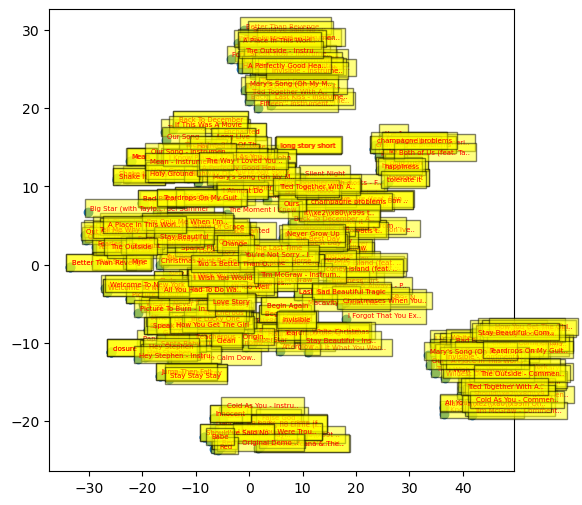

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
for i in range(tsne_results.shape[0]):
    track_name = repr(df['name'].iloc[i]).replace('$', r'\$')[1:-1]
    plt.text(
        x=tsne_results[i, 0] + 0.3,
        y=tsne_results[i, 1] + 0.3,
        s=(track_name[:MAX_TRACK_NAME_LENGTH] + '..') if len(track_name) > MAX_TRACK_NAME_LENGTH else track_name,
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
plt.show()

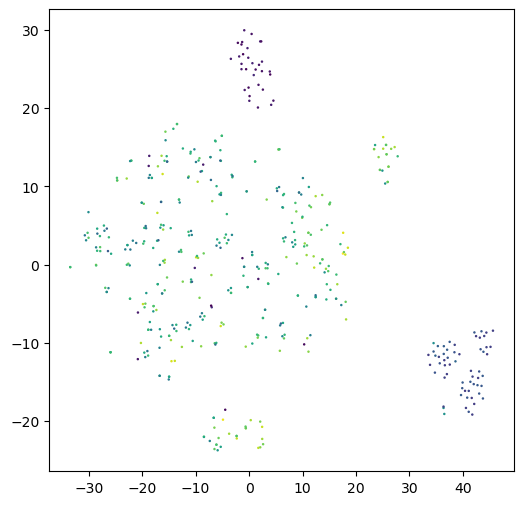

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
    tsne_results[:, 0],
    tsne_results[:, 1],
    cmap='viridis',
    c=colors,
    s=0.6
)

In [48]:
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0, random_state=SEED)
pacmap_results = embedding.fit_transform(X_selected, init='pca')

/Users/jozef/Documents/Data Science/Data-Science-Project/.conda/lib/python3.12/site-packages/pacmap/pacmap.py:828: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


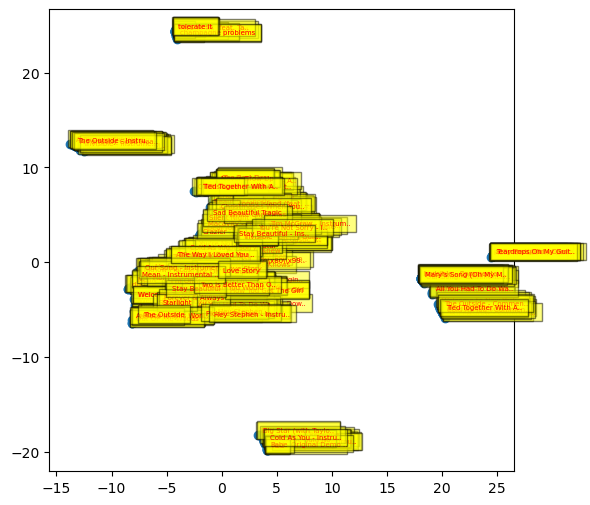

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(pacmap_results[:, 0], pacmap_results[:, 1])
for i in range(pacmap_results.shape[0]):
    track_name = repr(df['name'].iloc[i]).replace('$', r'\$')[1:-1]
    plt.text(
        x=pacmap_results[i, 0] + 0.3,
        y=pacmap_results[i, 1] + 0.3,
        s=(track_name[:MAX_TRACK_NAME_LENGTH] + '..') if len(track_name) > MAX_TRACK_NAME_LENGTH else track_name,
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
plt.show()

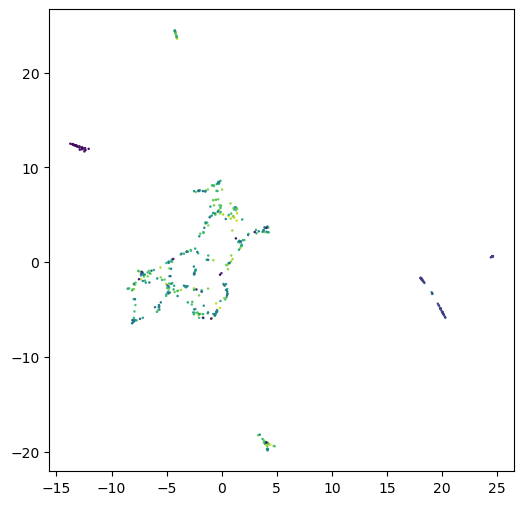

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
    pacmap_results[:, 0],
    pacmap_results[:, 1],
    cmap='viridis',
    c=colors,
    s=0.6
)

In [35]:
brc = Birch(n_clusters=2).fit(X_selected)
brc_results = brc.transform(X_selected)

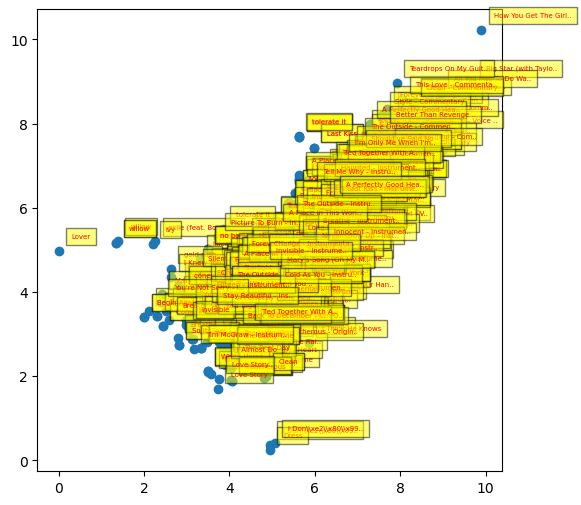

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(brc_results[:, 0], brc_results[:, 1])
for i in range(brc_results.shape[0]):
    track_name = repr(df['name'].iloc[i]).replace('$', r'\$')[1:-1]
    plt.text(
        x=brc_results[i, 0] + 0.3,
        y=brc_results[i, 1] + 0.3,
        s=(track_name[:MAX_TRACK_NAME_LENGTH] + '..') if len(track_name) > MAX_TRACK_NAME_LENGTH else track_name,
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
plt.show()

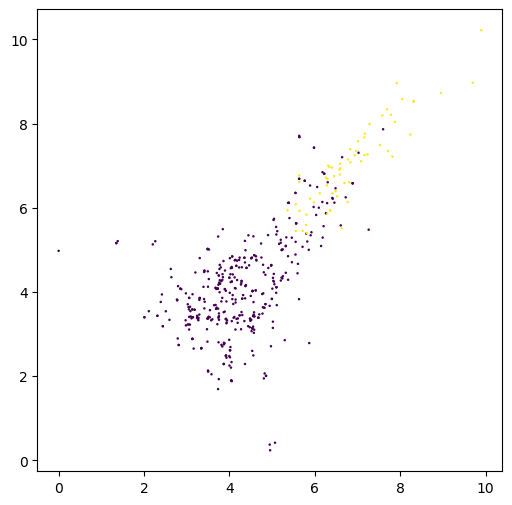

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
    brc_results[:, 0],
    brc_results[:, 1],
    cmap='viridis',
    c=brc.labels_,
    s=0.6
)